https://stepik.org/lesson/1370110/step/6

Q: 0.07 Q_svm: 0.06


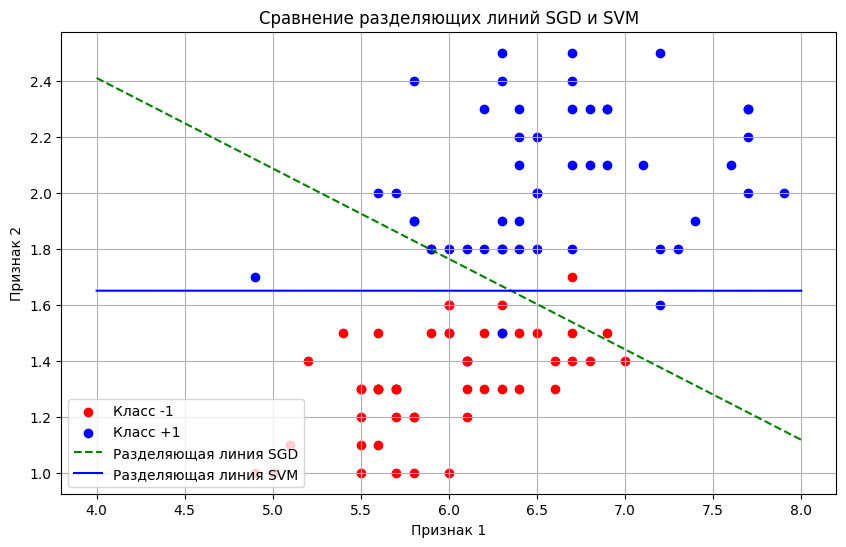

In [ ]:
import numpy as np
from sklearn import svm

# экспоненциальная функция потерь
def loss(w, x, y):
    M = np.dot(w, x) * y
    return np.exp(-M)


# производная экспоненциальной функции потерь по вектору w
def df(w, x, y):
    M = np.dot(w, x) * y
    return -np.exp(-M) * x.T * y


data_x = [(5.8, 1.2), (5.6, 1.5), (6.5, 1.5), (6.1, 1.3), (6.4, 1.3), (7.7, 2.0), (6.0, 1.8), (5.6, 1.3), (6.0, 1.6), (5.8, 1.9), (5.7, 2.0), (6.3, 1.5), (6.2, 1.8), (7.7, 2.3), (5.8, 1.2), (6.3, 1.8), (6.0, 1.0), (6.2, 1.3), (5.7, 1.3), (6.3, 1.9), (6.7, 2.5), (5.5, 1.2), (4.9, 1.0), (6.1, 1.4), (6.0, 1.6), (7.2, 2.5), (7.3, 1.8), (6.6, 1.4), (5.6, 2.0), (5.5, 1.0), (6.4, 2.2), (5.6, 1.3), (6.6, 1.3), (6.9, 2.1), (6.8, 2.1), (5.7, 1.3), (7.0, 1.4), (6.1, 1.4), (6.1, 1.8), (6.7, 1.7), (6.0, 1.5), (6.5, 1.8), (6.4, 1.5), (6.9, 1.5), (5.6, 1.3), (6.7, 1.4), (5.8, 1.9), (6.3, 1.3), (6.7, 2.1), (6.2, 2.3), (6.3, 2.4), (6.7, 1.8), (6.4, 2.3), (6.2, 1.5), (6.1, 1.4), (7.1, 2.1), (5.7, 1.0), (6.8, 1.4), (6.8, 2.3), (5.1, 1.1), (4.9, 1.7), (5.9, 1.8), (7.4, 1.9), (6.5, 2.0), (6.7, 1.5), (6.5, 2.0), (5.8, 1.0), (6.4, 2.1), (7.6, 2.1), (5.8, 2.4), (7.7, 2.2), (6.3, 1.5), (5.0, 1.0), (6.3, 1.6), (7.7, 2.3), (6.4, 1.9), (6.5, 2.2), (5.7, 1.2), (6.9, 2.3), (5.7, 1.3), (6.1, 1.2), (5.4, 1.5), (5.2, 1.4), (6.7, 2.3), (7.9, 2.0), (5.6, 1.1), (7.2, 1.8), (5.5, 1.3), (7.2, 1.6), (6.3, 2.5), (6.3, 1.8), (6.7, 2.4), (5.0, 1.0), (6.4, 1.8), (6.9, 2.3), (5.5, 1.3), (5.5, 1.1), (5.9, 1.5), (6.0, 1.5), (5.9, 1.8)]
data_y = [-1, -1, -1, -1, -1, 1, 1, -1, -1, 1, 1, -1, 1, 1, -1, 1, -1, -1, -1, 1, 1, -1, -1, -1, -1, 1, 1, -1, 1, -1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, 1, 1, -1, -1, -1, -1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 1, -1, -1, 1, -1, 1, -1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, -1, 1, -1, -1, -1, -1, 1, 1, -1, 1, -1, 1, 1, 1, 1, -1, 1, 1, -1, -1, -1, -1, 1]

x_train = np.array([[1, x[0], x[1]] for x in data_x])
y_train = np.array(data_y)

n_train = len(x_train)  # размер обучающей выборки
w = [0.0, 0.0, 0.0]  # начальные весовые коэффициенты
nt = np.array([0.5, 0.01, 0.01]) # шаг обучения для каждого параметра w0, w1, w2
lm = 0.01  # значение параметра лямбда для вычисления скользящего экспоненциального среднего
N = 500  # число итераций алгоритма SGD
batch_size = 10 # размер мини-батча (величина K = 10)
np.random.seed(0) # генерация одинаковых последовательностей псевдослучайных чисел

Qe = np.array([loss(w, x, y) for x, y in zip(x_train, y_train)]).mean(axis=0)

Q_plot = []
for _ in range(N):
    k = np.random.randint(0, n_train-batch_size-1)
    b = range(k, k+batch_size)
    grad = np.array([df(w, x, y) for x, y in zip(x_train[b], y_train[b])]).mean(axis=0)
    w -= nt * grad
    loss_k = np.array([loss(w, x, y) for x, y in zip(x_train[b], y_train[b])]).mean(axis=0)
    Qe = lm * loss_k + (1 - lm) * Qe
    Q_plot.append(Qe)

Q = sum(x_train @ w.T * y_train < 0) / len(y_train)


# SVM (Support Vector Machine) для сравнения
clf = svm.SVC(kernel='linear').fit(data_x, data_y)
w_svm = np.array([clf.intercept_[0], clf.coef_[0][0], clf.coef_[0][1]])
Q_svm = sum(x_train @ w_svm.T * y_train < 0) / len(y_train)

# print('Q:', Q, 'Q_svm:', Q_svm)

'''ГРАФИК'''
import matplotlib.pyplot as plt

# Создание сетки для визуализации границ решений
xx = np.linspace(4., 8., 100)
yy_sgd = -(w[0] + w[1] * xx) / w[2]
yy_svm = -(w_svm[0] + w_svm[1] * xx) / w_svm[2]

# Визуализация данных и разделяющих линий
plt.figure(figsize=(10, 6))

# Точки данных
for i in range(len(data_x)):
    if data_y[i] == -1:
        plt.scatter(data_x[i][0], data_x[i][1], color='red', label='Класс -1' if i == 0 else "")
    else:
        plt.scatter(data_x[i][0], data_x[i][1], color='blue', label='Класс +1' if i == len(data_x) - 10 else "")

# Линия SGD
plt.plot(xx, yy_sgd, 'g--', label='Разделяющая линия SGD')

# Линия SVM
plt.plot(xx, yy_svm, 'b-', label='Разделяющая линия SVM')

plt.title("Сравнение разделяющих линий SGD и SVM")
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")
plt.legend()
plt.grid()
plt.show()